**This notebook explores Carcinogenic Pesticide usage throughout CA school districts**

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("../src/utils").resolve()))

import numpy as np
import pandas as pd

from utils import (
    create_CA_visualization,
    demographic_intensity_correlations,
    difference_in_years,
    get_aggregate_results,
    into_gdf,
    top_10_barplot,
    top_n_df,
    trendPlot,
)

In [2]:
# data - schools
schools = pd.read_parquet(str(Path("../data/ca-school.parquet").resolve()))

carcData = get_aggregate_results(
    "school",
    start_year=2022,
    start_month=1,
    end_year=2022,
    end_month=12,
    health_and_env_risks="CARC",
)

carcData = carcData.merge(schools, on="FIPS")
carcData_schools = into_gdf(carcData, "geometry")

data = carcData_schools

school: 


,Area Name,FIPS,ai_intensity
0,Di Giorgio Elementary School District,11130,16603.34
1,Oxnard Elementary School District,29220,15948.29
2,Santa Maria-Bonita Elementary School District,05580,10352.55
3,Rio Elementary School District,32760,9212.87
4,Livingston Union School District,22170,9098.09
5,Mesa Union Elementary School District,24720,8776.21
6,Santa Rita Union Elementary School District,35790,7100.82
7,Winton School District,42960,6731.98
8,Delhi Unified School District,00039,6471.14
9,Ocean View Elementary School District (Ventura...,28170,6392.07


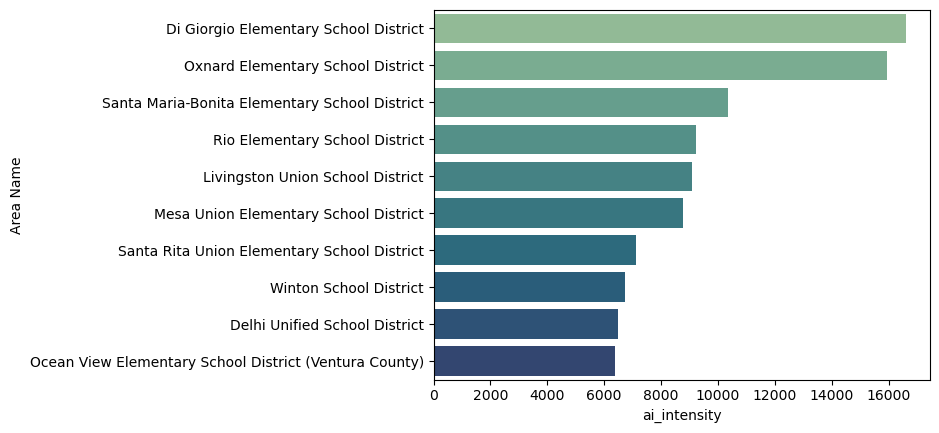

In [3]:
print("school: ")
carc_top_10_schools = top_n_df(data, "", "ai_intensity", n=10)
display(carc_top_10_schools)

top_10_barplot(carc_top_10_schools)

correlations with school districts: 


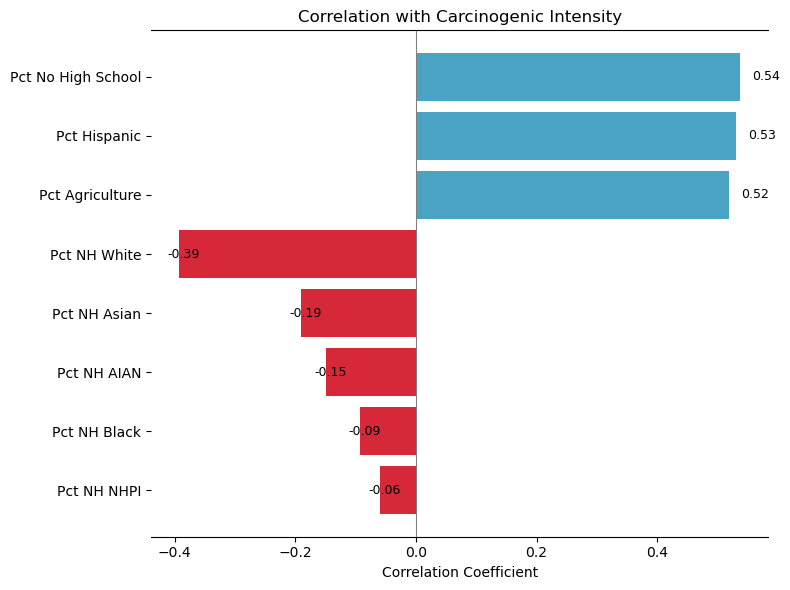

,Carcinogenic Intensity
Pct NH Black,-0.092213
Pct Hispanic,0.531207
Pct NH White,-0.392431
Pct NH Asian,-0.190003
Pct NH AIAN,-0.148636
Pct NH NHPI,-0.059173
Pct No High School,0.537132
Pct Agriculture,0.518836


In [4]:
# school correlations:
print("correlations with school districts: ")
data["Carcinogenic Intensity"] = np.log1p(data["ai_intensity"])
demographic_intensity_correlations(data, "Carcinogenic Intensity")

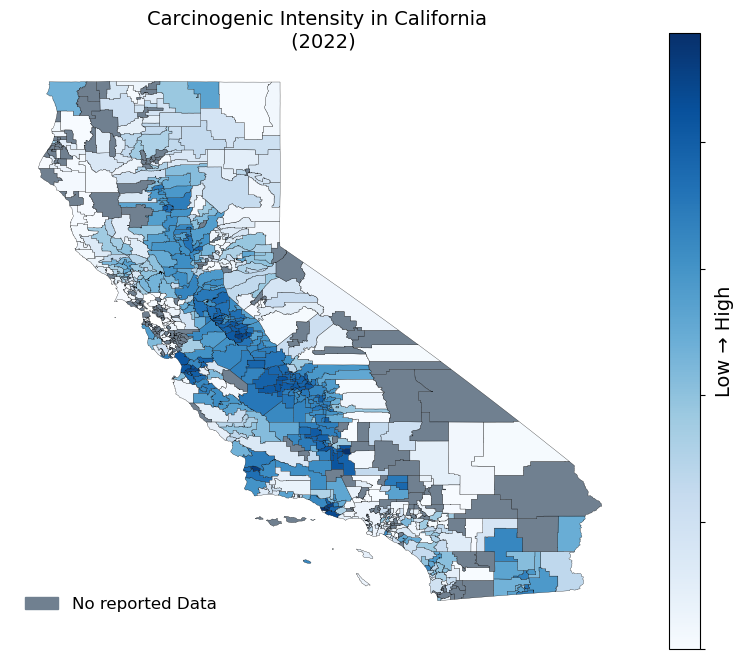

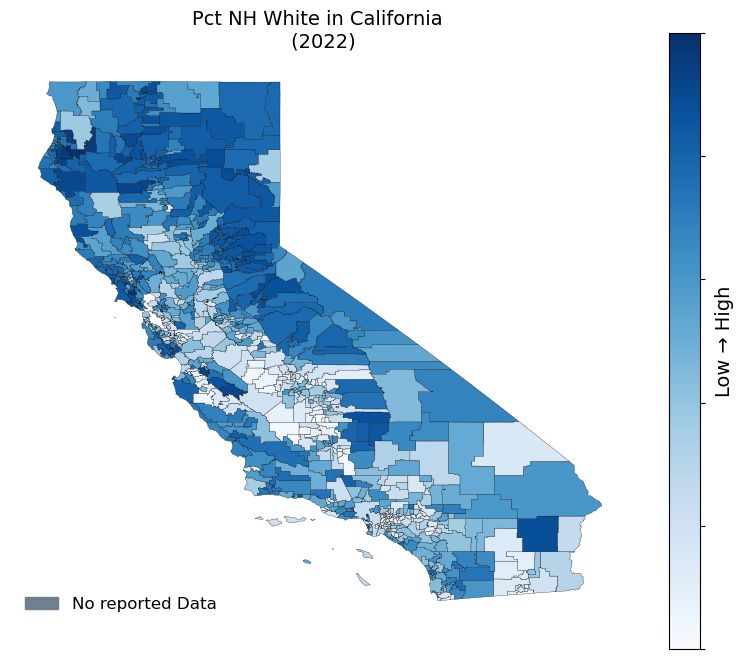

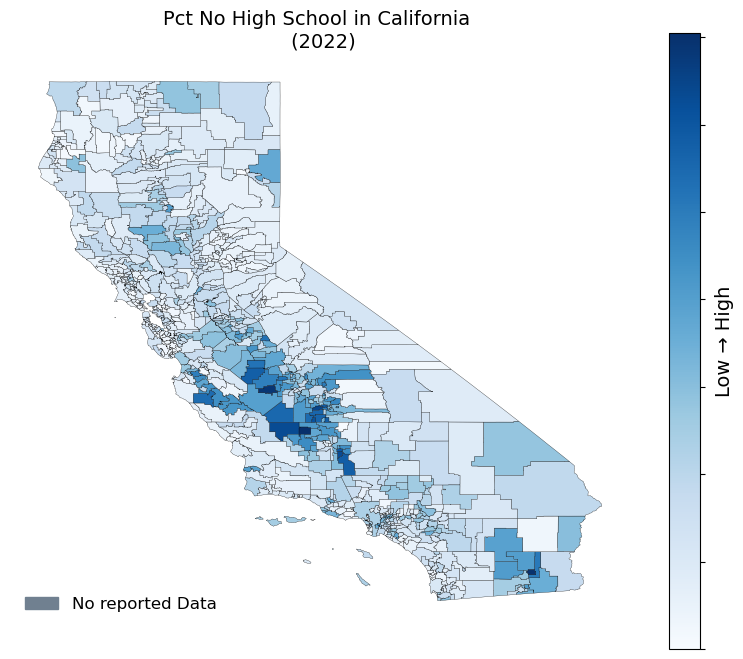

In [5]:
create_CA_visualization(data, "Carcinogenic Intensity", "2022")
create_CA_visualization(data, "Pct NH White", "2022")
create_CA_visualization(data, "Pct No High School", "2022")

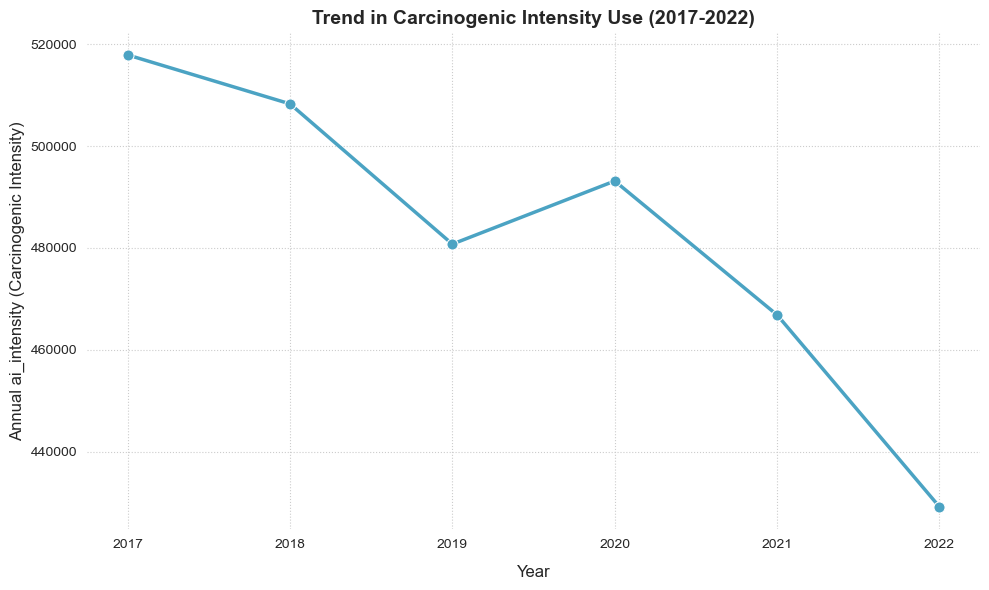

In [6]:
trendPlot("Carcinogenic Intensity", [("health_and_env_risks", ["CARC"])])

In [8]:
carcData2017 = get_aggregate_results(
    "school",
    start_year=2017,
    start_month=1,
    end_year=2017,
    end_month=12,
    health_and_env_risks="CARC",
)

difference_in_application = difference_in_years(
    carcData2017, carcData, "ai_intensity", ["Area Name"]
)

display(difference_in_application["ai_intensity_change"].describe().to_frame())
display(difference_in_application.sort_values(by="ai_intensity_change")[:10])
display(
    difference_in_application.sort_values(by="ai_intensity_change", ascending=False)[
        :15
    ]
)

,ai_intensity_change
count,642.000000
mean,-137.983754
std,1267.403560
min,-24252.180000
25%,-74.607500
50%,-2.165000
75%,2.402500
max,8953.640000


,Area Name,FIPS,ai_intensity_2017,ai_intensity_2022,ai_intensity_change
85,Salida Union Elementary School District,33900,26708.97,2456.79,-24252.18
208,Hart-Ransom Union Elementary School District,16650,12378.36,3382.68,-8995.68
128,Nuestro Elementary School District,27750,7390.94,2655.44,-4735.50
379,Norris Elementary School District,27450,4230.84,363.10,-3867.74
93,Di Giorgio Elementary School District,11130,20272.71,16603.34,-3669.37
97,Lakeside Union School District,20730,4283.97,849.61,-3434.36
654,Hilmar Unified School District,17220,6870.27,3580.75,-3289.52
272,Heber Elementary School District,16830,3881.11,635.71,-3245.40
129,Outside Creek Elementary School District,29160,4443.85,1336.11,-3107.74
292,Riverbank Unified School District,00061,4010.71,945.82,-3064.89


,Area Name,FIPS,ai_intensity_2017,ai_intensity_2022,ai_intensity_change
168,Oxnard Elementary School District,29220,6994.65,15948.29,8953.64
560,Mesa Union Elementary School District,24720,4289.68,8776.21,4486.53
635,Lagunita Elementary School District,20490,566.52,4845.09,4278.57
640,Santa Rita Union Elementary School District,35790,3546.25,7100.82,3554.57
86,Paradise Elementary School District,29790,1861.30,5388.82,3527.52
471,Winton School District,42960,4053.72,6731.98,2678.26
483,Burrel Union Elementary School District,06540,2385.86,4078.84,1692.98
28,Ocean View Elementary School District (Ventura...,28170,4912.13,6392.07,1479.94
294,West Park Elementary School District,42060,1228.02,2623.17,1395.15
180,Sundale Union Elementary School District,38340,1515.65,2854.45,1338.80
